In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gld = pd.read_csv('gld.csv')
btc = pd.read_csv('btc.csv')

In [4]:
gld.Date = pd.to_datetime(gld.Date)
btc.Date = pd.to_datetime(btc.Date)

In [5]:
gld.sort_values(by = 'Date', inplace = True)
btc.sort_values(by = 'Date', inplace = True)

In [6]:
btc = btc[["Date", "Open", "Close", "High", "Low", "Volume"]].rename(columns = {"Close":"Price", "Volume":"Vol"})

In [7]:
gld = gld[["Date", "Open", "Price", "High", "Low", "Vol."]].rename(columns = {"Vol.":"Vol"})

In [8]:
btc = btc.set_index("Date").loc[list(gld["Date"])]

In [9]:
gld.set_index("Date", inplace = True)

In [10]:
null_indexes = btc.loc[btc.isna()["Price"]].index

In [11]:
btc.drop(null_indexes, inplace=True)
gld.drop(null_indexes, inplace=True)

In [12]:
btc.drop(btc.loc["2021-10-19",:].name, inplace = True)
gld.drop(gld.loc["2021-10-19",:].name, inplace = True)

In [13]:
gld_dash_indexes = gld[(gld == '-').any(axis = 1)].index

In [14]:
btc.drop(gld_dash_indexes, inplace=True)
gld.drop(gld_dash_indexes, inplace=True)

In [15]:
gld["Vol"].replace(regex = 'K', value = '', inplace = True)

In [16]:
gld.replace(regex = ',', value = '', inplace = True)

In [17]:
gld = gld.astype({"Price":"float32","High":"float32","Low":"float32","Vol":"float32","Open":"float32"})

In [18]:
gld.describe()

,Open,Price,High,Low,Vol
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,1495.827637,1497.147827,1499.398682,1491.770752,14.368081
std,223.825928,223.969437,228.006592,218.820251,49.915520
min,1123.000000,1123.000000,1123.000000,1123.000000,0.000000
25%,1326.800049,1326.800049,1326.800049,1326.800049,0.020000
50%,1394.800049,1394.800049,1394.800049,1394.800049,0.100000
75%,1725.900024,1726.500000,1732.799988,1712.000000,0.540000
max,2120.000000,2103.199951,2120.000000,2085.899902,385.890015


In [19]:
btc.describe()

,Open,Price,High,Low,Vol
count,1455.000000,1455.000000,1455.000000,1455.000000,1.455000e+03
mean,11473.900337,11509.522745,11826.923989,11100.238113,1.753716e+10
std,14523.439955,14575.299455,15010.281565,13997.380194,2.206237e+10
min,369.350006,364.330994,374.950012,364.330994,3.404250e+07
25%,2457.905029,2471.515014,2546.184936,2327.180054,1.113985e+09
50%,7173.729980,7217.427246,7363.529297,6970.819824,7.931219e+09
75%,10682.477539,10679.987305,10922.776856,10300.423828,2.761437e+10
max,63523.753906,63503.457031,64863.097656,62208.964844,3.509679e+11


In [20]:
df_results = pd.concat([btc["Price"], btc["Price"].shift(1), btc["Price"].shift(2), btc["Price"].shift(3), btc["Price"].shift(4), btc["Price"].shift(5), btc["Vol"], btc["Vol"].shift(1), btc["Vol"].shift(2), btc["Vol"].shift(3), btc["Vol"].shift(4), btc["Vol"].shift(5)], axis = 1, keys = ['p','p_1','p_2','p_3','p_4','p_5', 'v', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5']).iloc[5:,:]

In [21]:
train, test = df_results.iloc[:1200, :], df_results.iloc[1200:, :]

In [22]:
x_test = test.drop(["p", "v"], axis = 1)
y_test = test[["p"]]
x_train = train.drop(["p", "v"], axis = 1)
y_train = train[["p"]]

In [23]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(x_train, y_train)
y_predicted = elastic.predict(x_test)

C:\Users\jas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82487455.90250626, tolerance: 1919461.1348017354
  model = cd_fast.enet_coordinate_descent(


In [24]:
df = pd.concat([test, pd.DataFrame(y_predicted, index = test.index, columns=["predicted"])], axis = 1)

In [25]:
df

,p,p_1,p_2,p_3,p_4,p_5,v,v_1,v_2,v_3,v_4,v_5,predicted
Date,,,,,,,,,,,,,
2020-10-21,12823.689453,11916.334961,11742.037109,11322.123047,11495.349609,11429.506836,4.341471e+10,3.091582e+10,2.386077e+10,2.563548e+10,2.448723e+10,2.410343e+10,11872.911698
2020-10-22,12965.891602,12823.689453,11916.334961,11742.037109,11322.123047,11495.349609,3.472976e+10,4.341471e+10,3.091582e+10,2.386077e+10,2.563548e+10,2.448723e+10,12797.198359
2020-10-23,12931.539063,12965.891602,12823.689453,11916.334961,11742.037109,11322.123047,2.897498e+10,3.472976e+10,4.341471e+10,3.091582e+10,2.386077e+10,2.563548e+10,12985.788904
2020-10-26,13075.248047,12931.539063,12965.891602,12823.689453,11916.334961,11742.037109,2.946146e+10,2.897498e+10,3.472976e+10,4.341471e+10,3.091582e+10,2.386077e+10,12907.444094
2020-10-27,13654.218750,13075.248047,12931.539063,12965.891602,12823.689453,11916.334961,3.374988e+10,2.946146e+10,2.897498e+10,3.472976e+10,4.341471e+10,3.091582e+10,13005.293406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-12,56041.058594,57484.789063,53967.847656,53805.984375,55361.449219,51514.812500,4.108376e+10,4.263733e+10,3.480087e+10,3.680786e+10,4.903473e+10,3.587390e+10,56843.062005
2021-10-13,57401.097656,56041.058594,57484.789063,53967.847656,53805.984375,55361.449219,4.168425e+10,4.108376e+10,4.263733e+10,3.480087e+10,3.680786e+10,4.903473e+10,56093.497858
2021-10-14,57321.523438,57401.097656,56041.058594,57484.789063,53967.847656,53805.984375,3.661579e+10,4.168425e+10,4.108376e+10,4.263733e+10,3.480087e+10,3.680786e+10,57295.301234


<AxesSubplot:xlabel='Date'>

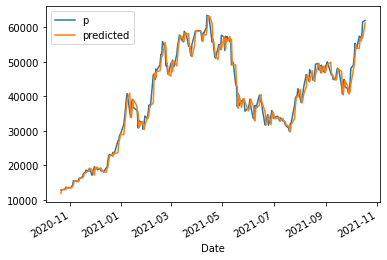

In [26]:
df[["p", "predicted"]].plot()

In [27]:
import numpy as np
np.mean((abs(df["p"] - df["predicted"]) / df["p"]) * 100)

3.9015761645142133